In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing CSV
df = pd.read_csv("argentina_all.csv")
pd.set_option('display.max_columns', None) 
df.head(40)
              

/var/folders/56/23n39z096355_z2sk8w5kwkw0000gn/T/ipykernel_8695/4236624562.py:2: DtypeWarning: Columns (29,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/andreagarcia/Desktop/crc_arg/argentina_all.csv")


,match_id,match_run_time_in_ms,match_run_time,match_time_in_ms,event_id,team_id,from_player_id,player_seq_id,event_order,half_time,category,event_type,event,side,x,x_mirrored,y,y_mirrored,action_type,to_player_id,sequence_type,outcome,outcome_additional,opposition_touch,body_type,direction,pressure,style,style_additional,frame_location,game_state,game_period,game_period_additional,game_involvement,origin,origin_additional,save_type,save_detail,stance,x_frame,y_frame,movement,offering_to_receive_total_units,line_break_direction,line_break_outcome,team_shape,team_unit,team_units_broken,total_team_units,event_end_time_in_ms,x_location_start,x_location_start_mirrored,x_location_end,x_location_end_mirrored,y_location_start,y_location_start_mirrored,y_location_end,y_location_end_mirrored,version,team_name,from_player_name,from_player_shirt_number,to_player_name,to_player_shirt_number
0,140980,0,00:00:00,0,1,0,0,1,1,1,referee_action,game_period_action,game_period_start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,first_half,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,TEAM REFEREES,REFEREE,NaN,NaN,NaN
1,140980,87,00:00:00,87,2,1882881,381604,2,1,1,in_possession,start_restart,kickoff,l,0.500952,0.500952,0.502941,0.502941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,BRAZIL,GABI NUNES,9.0,NaN,NaN
2,140980,87,00:00:00,87,3,1882881,381604,2,2,1,in_possession,distribution,pass,l,0.500952,0.500952,0.502941,0.502941,NaN,398375.0,NaN,possession_complete,NaN,NaN,right_foot,NaN,no_pressure,push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_line_break,NaN,NaN,NaN,NaN,NaN,0.500952,0.500952,0.416667,0.416667,0.502941,0.502941,0.512500,0.512500,v1.1,BRAZIL,GABI NUNES,9.0,DUDA SANTOS,21.0
3,140980,983,00:00:00,983,4,1882881,381604,2,3,1,in_possession,possession_outcome,possession_outcome,l,0.416667,0.416667,0.512500,0.512500,NaN,NaN,possession,possession_complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,BRAZIL,GABI NUNES,9.0,NaN,NaN
4,140980,983,00:00:00,983,5,1884881,420326,3,1,1,out_of_possession,defensive_pressure,pressing,r,0.483714,0.516286,0.598676,0.401324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shown_outside,indirect_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,DALILA IPPOLITO,10.0,NaN,NaN
5,140980,1005,00:00:01,1005,6,1882881,398375,4,1,1,in_possession,offering_to_receive,no_offer,l,0.404857,0.404857,0.518971,0.518971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_movement,3.0,NaN,NaN,NaN,NaN,NaN,3.0,1005.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,BRAZIL,DUDA SANTOS,21.0,NaN,NaN
6,140980,1005,00:00:01,1005,7,1882881,398375,4,2,1,in_possession,receiving_possession,reception,l,0.404857,0.404857,0.518971,0.518971,kickoff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inside,in_front,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,BRAZIL,DUDA SANTOS,21.0,NaN,NaN
7,140980,2302,00:00:02,2302,8,1884881,420326,3,2,1,out_of_possession,possession_outcome,possession_outcome,r,0.448476,0.551524,0.513824,0.486176,NaN,NaN,possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,DALILA IPPOLITO,10.0,NaN,NaN
8,140980,2330,00:00:02,2330,9,1882881,398375,4,3,1,in_possession,distribution,pass,l,0.418000,0.418000,0.482500,0.482500,NaN,420470.0,NaN,possession_complete,NaN,NaN,right_foot,NaN,no_pressure,push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_line_break,NaN,NaN,NaN,NaN,NaN,0.418000,0.4

In [8]:
#Creating new dataset without duplicate names
df1 = df[['from_player_id','from_player_name']]
#Dropping duplicates
df1.drop_duplicates(subset=['from_player_id'], inplace=True)
df1.reset_index(drop=True, inplace=True)


#Saving CSV
df1.to_csv("corrected_names.csv")

/var/folders/56/23n39z096355_z2sk8w5kwkw0000gn/T/ipykernel_8695/1802504190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(subset=['from_player_id'], inplace=True)


In [9]:
#Creating new dataset without duplicate names for to_player_name column
df2 = df[['to_player_id','to_player_name']]
#Dropping duplicates
df2.drop_duplicates(subset=['to_player_id'], inplace=True)
df2.reset_index(drop=True, inplace=True)
#Saving CSV
df2.to_csv("to_corrected_names.csv")

/var/folders/56/23n39z096355_z2sk8w5kwkw0000gn/T/ipykernel_8695/3335835592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset=['to_player_id'], inplace=True)


In [10]:
#Importing CSV with the corrected names
corrected_names = pd.read_csv("corrected_names.csv")
corrected_names.head()
corrected_names.reset_index(drop=True, inplace=True)
corrected_names.head()

#Merging both datasets so there are no duplicate names on the original dataframe
merged_df = pd.merge(df, corrected_names, on='from_player_id', how='left')
#Dropping from_player_name_x column
merged_df.drop(columns=['Unnamed: 0', 'from_player_name_x'], inplace=True)
#Renaming from_player_name_y to from_player_name
merged_df.rename(columns={'from_player_name_y': 'from_player_name'}, inplace=True)

merged_df.head()

,match_id,match_run_time_in_ms,match_run_time,match_time_in_ms,event_id,team_id,from_player_id,player_seq_id,event_order,half_time,category,event_type,event,side,x,x_mirrored,y,y_mirrored,action_type,to_player_id,sequence_type,outcome,outcome_additional,opposition_touch,body_type,direction,pressure,style,style_additional,frame_location,game_state,game_period,game_period_additional,game_involvement,origin,origin_additional,save_type,save_detail,stance,x_frame,y_frame,movement,offering_to_receive_total_units,line_break_direction,line_break_outcome,team_shape,team_unit,team_units_broken,total_team_units,event_end_time_in_ms,x_location_start,x_location_start_mirrored,x_location_end,x_location_end_mirrored,y_location_start,y_location_start_mirrored,y_location_end,y_location_end_mirrored,version,team_name,from_player_shirt_number,to_player_name,to_player_shirt_number,from_player_name
0,140980,0,00:00:00,0,1,0,0,1,1,1,referee_action,game_period_action,game_period_start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,first_half,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,TEAM REFEREES,NaN,NaN,NaN,REFEREE
1,140980,87,00:00:00,87,2,1882881,381604,2,1,1,in_possession,start_restart,kickoff,l,0.500952,0.500952,0.502941,0.502941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,BRAZIL,9.0,NaN,NaN,GABI NUNES
2,140980,87,00:00:00,87,3,1882881,381604,2,2,1,in_possession,distribution,pass,l,0.500952,0.500952,0.502941,0.502941,NaN,398375.0,NaN,possession_complete,NaN,NaN,right_foot,NaN,no_pressure,push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_line_break,NaN,NaN,NaN,NaN,NaN,0.500952,0.500952,0.416667,0.416667,0.502941,0.502941,0.5125,0.5125,v1.1,BRAZIL,9.0,DUDA SANTOS,21.0,GABI NUNES
3,140980,983,00:00:00,983,4,1882881,381604,2,3,1,in_possession,possession_outcome,possession_outcome,l,0.416667,0.416667,0.512500,0.512500,NaN,NaN,possession,possession_complete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,BRAZIL,9.0,NaN,NaN,GABI NUNES
4,140980,983,00:00:00,983,5,1884881,420326,3,1,1,out_of_possession,defensive_pressure,pressing,r,0.483714,0.516286,0.598676,0.401324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shown_outside,indirect_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,10.0,NaN,NaN,DALILA IPPOLITO


In [11]:
merged_df.shape

(45141, 64)

In [12]:
#Visualizing 64 columns
pd.set_option('display.max_columns', None) 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(merged_df.dtypes)

match_id                             int64
match_run_time_in_ms                 int64
match_run_time                      object
match_time_in_ms                     int64
event_id                             int64
team_id                              int64
from_player_id                       int64
player_seq_id                        int64
event_order                          int64
half_time                            int64
category                            object
event_type                          object
event                               object
side                                object
x                                  float64
x_mirrored                         float64
y                                  float64
y_mirrored                         float64
action_type                         object
to_player_id                       float64
sequence_type                       object
outcome                             object
outcome_additional                  object
opposition_

In [13]:
merged_df.describe()

,match_id,match_run_time_in_ms,match_time_in_ms,event_id,team_id,from_player_id,player_seq_id,event_order,half_time,x,x_mirrored,y,y_mirrored,to_player_id,game_period_additional,game_involvement,x_frame,y_frame,offering_to_receive_total_units,total_team_units,event_end_time_in_ms,x_location_start,x_location_start_mirrored,x_location_end,x_location_end_mirrored,y_location_start,y_location_start_mirrored,y_location_end,y_location_end_mirrored,from_player_shirt_number,to_player_shirt_number
count,45141.000000,4.514100e+04,4.514100e+04,45141.000000,4.514100e+04,45141.000000,45141.000000,45141.000000,45141.000000,45110.000000,45110.000000,45110.000000,45110.000000,3978.000000,0.0,0.0,175.000000,175.000000,8392.000000,11863.000000,8.752000e+03,9868.000000,9868.000000,9869.000000,9869.000000,9868.000000,9868.000000,9869.000000,9869.000000,45113.000000,3978.000000
mean,136838.926187,3.402478e+06,2.808984e+06,3251.284553,1.883352e+06,401669.540506,1129.727388,2.102257,1.495780,0.496130,0.495775,0.459555,0.496097,401152.281046,NaN,NaN,0.464482,0.255586,2.577574,2.589227,3.398776e+06,0.493965,0.520407,0.494661,0.561162,0.470905,0.498806,0.462015,0.498996,11.423692,11.219708
std,4510.884003,2.180172e+06,1.652530e+06,1903.766448,4.694505e+04,61297.461320,661.436806,1.046906,0.499988,0.236913,0.236907,0.291619,0.294385,56174.809482,NaN,NaN,0.164587,0.198018,0.556165,0.561607,2.180860e+06,0.241643,0.240856,0.248169,0.240572,0.282955,0.284445,0.293892,0.296335,6.094427,6.150448
min,131909.000000,0.000000e+00,-2.890000e+02,1.000000,0.000000e+00,0.000000,-10.000000,1.000000,1.000000,-0.001000,-0.001000,-0.001000,-0.001000,199325.000000,NaN,NaN,0.111400,0.021920,1.000000,1.000000,9.590000e+02,-0.001000,-0.001000,-0.013714,-0.001000,-0.001000,-0.001000,-0.091029,-0.091029,1.000000,1.000000
25%,131910.000000,1.393204e+06,1.393187e+06,1613.000000,1.883722e+06,357688.000000,560.000000,1.000000,1.000000,0.323810,0.324095,0.199414,0.237363,357688.000000,NaN,NaN,0.350265,0.096690,2.000000,2.000000,1.388363e+06,0.310762,0.349668,0.308000,0.394476,0.220520,0.249022,0.200294,0.239265,6.000000,6.000000
50%,140961.000000,3.036150e+06,2.830299e+06,3225.000000,1.884881e+06,420165.000000,1123.000000,2.000000,1.000000,0.494112,0.500000,0.447206,0.497246,417317.000000,NaN,NaN,0.448020,0.201810,3.000000,3.000000,3.027818e+06,0.491589,0.539720,0.489714,0.571810,0.463925,0.500000,0.452059,0.499710,11.000000,11.000000
75%,140965.000000,5.385600e+06,4.180890e+06,4837.000000,1.884881e+06,461590.000000,1679.000000,3.000000,2.000000,0.669119,0.668762,0.704473,0.755147,461589.000000,NaN,NaN,0.586340,0.360960,3.000000,3.000000,5.388473e+06,0.676000,0.707337,0.679252,0.748598,0.708676,0.745588,0.710580,0.758986,17.000000,16.000000
max,140980.000000,7.281479e+06,6.005754e+06,7079.000000,1.889513e+06,481898.000000,2467.000000,7.000000,2.000000,1.001000,1.001000,1.001000,1.001000,481898.000000,NaN,NaN,0.906440,0.965870,4.000000,4.000000,7.269452e+06,1.001000,1.001000,1.004766,1.013714,1.001000,1.001000,1.017206,1.013044,23.000000,23.000000


In [14]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45141 entries, 0 to 45140
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   match_id                         45141 non-null  int64  
 1   match_run_time_in_ms             45141 non-null  int64  
 2   match_run_time                   45141 non-null  object 
 3   match_time_in_ms                 45141 non-null  int64  
 4   event_id                         45141 non-null  int64  
 5   team_id                          45141 non-null  int64  
 6   from_player_id                   45141 non-null  int64  
 7   player_seq_id                    45141 non-null  int64  
 8   event_order                      45141 non-null  int64  
 9   half_time                        45141 non-null  int64  
 10  category                         45141 non-null  object 
 11  event_type                       45141 non-null  object 
 12  event             

In [15]:
#Exploratory Data Analysis

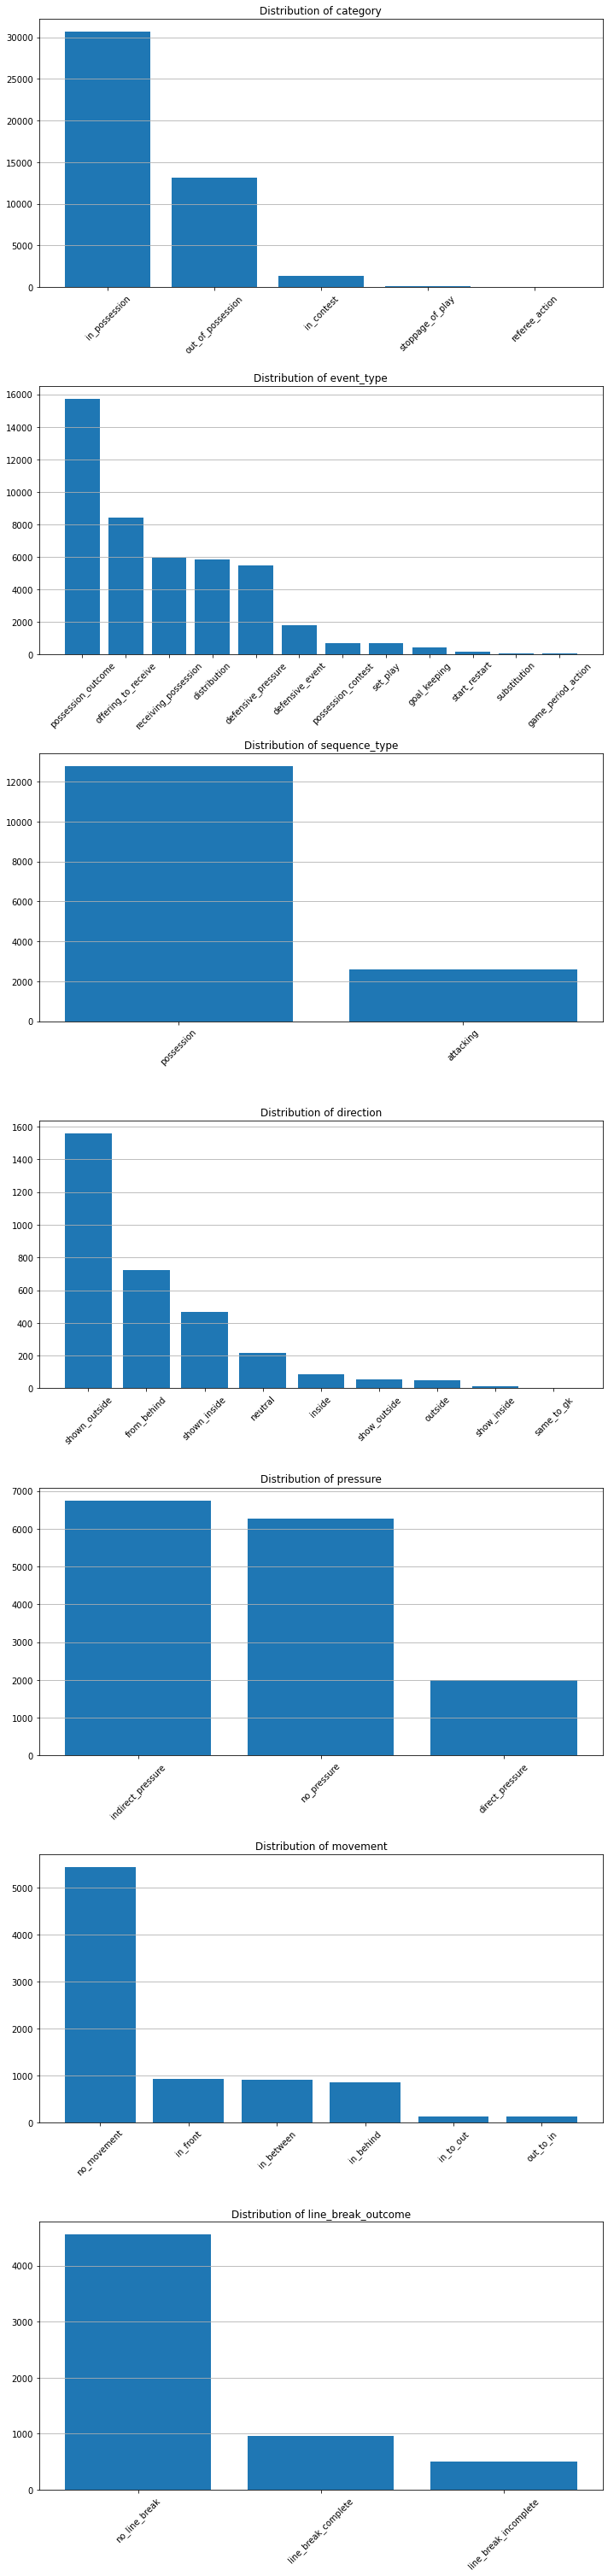

In [16]:
#Creating bar plots to visualize distribution of each categorical column
#List of categorical columns we want to viusalize
categorical_columns = ['category','event_type', 'sequence_type','direction','pressure','movement','line_break_outcome']

# Calculating the number of rows for subplots
num_rows = len(categorical_columns)

# Create subplots for each categorical column
fig, axs = plt.subplots(num_rows, 1, figsize=(10, num_rows * 6))
# Ensuring axs is always a 2D array, even if it's a single row or column
if num_rows == 1:
    axs = [axs]

#Iterating through each categorical column and creating a bar plot
for ax, col in zip(axs, categorical_columns):
    #Calculating the value counts for the categorical column
    value_counts = merged_df[col].value_counts()

    #Creating a bar plot
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title('Distribution of ' + col)
    ax.grid(axis='y')
    ax.tick_params(axis='x', rotation=45)  
    plt.tight_layout()

In [17]:
#Visualizing events unique values and count
merged_df['event'].value_counts()

possession_outcome         15060
reception                   5954
pass                        5183
no_offer                    4463
offer                       3929
pressing                    2886
pushing_on                  2602
tackle                       578
clearance                    548
aerial_duel                  526
block                        407
throwin                      391
ball_progression             257
cross                        232
freekick                     213
foul_against                 195
foul_for                     183
goal_prevention              150
attempt_at_goal              144
take_on_against              139
duel                         134
goalkick                     119
interception                 117
goalkeeper_intervention      115
referee_event                 83
substitution_on               64
throw                         57
active_engagement             55
corner                        48
kick_from_hands               43
aerial_con

In [18]:
##Visualizing outcome unique values and count
merged_df['outcome'].value_counts()

possession_complete                   8291
possession_incomplete                 2600
possession_interrupted                1504
possession_won                        1235
possession_out_of_play_interrupted    1092
possession_lost                        964
possession_out_of_play_lost            528
opposition_retained                    460
teammate_reception                     301
complete                               199
possession_retained                    148
incomplete                             137
no_contact                              97
possession_out_of_play_won              96
defensive_intervention                  81
off_target                              60
on_target                               51
go                                      49
opposition_beaten                       48
out_of_play                              8
opposition_retention                     8
deflected_off_target                     7
teammate_defensive_event                 7
stop       

In [19]:
#Visualizing outcome additional unique values and count
merged_df['outcome_additional'].value_counts()

defensive_event         1980
player_on_ball_error    1563
lost                     357
won                      319
blocked_pass             309
gk_in_possession         115
foul_against              56
referee_event             53
unintentional_touch       49
receiver_error            47
blocked_cross             38
saved                     34
blocked_clearance         31
foul_for                  25
gk_duel                   24
yellow_card               22
goal                      22
blocked_shot              19
assist                    14
deflected_shot             9
direct_to_area             6
1v1                        5
goal_disallowed            2
1v2                        1
2nd_yellow_card            1
Name: outcome_additional, dtype: int64

In [20]:
#Visualizing style unique values and count
merged_df['style'].value_counts()

push                      4101
lofted                    1122
in_front_of_final_unit     587
from_final_unit            329
take_on_1v1                134
step_in_opposed            118
driven                      67
inswing                     59
outswing                    42
underarm                    38
kick_from_hands             29
push_cross                  21
overarm                     16
drop_kick                    9
offside_to_onside            7
step_in_unopposed            5
sidekick                     5
sidearm                      3
cutback                      3
Name: style, dtype: int64

In [21]:
#Creating a subset only with plays from Argentina
arg = merged_df.loc[merged_df['team_name'] == 'ARGENTINA']

#Importing CSV with player positions from Argentina
argentina_positions = pd.read_csv("argentina_positions.csv")

#Merging with arg dataset
arg_merged = pd.merge(arg, argentina_positions, on='from_player_name', how='left')
arg_merged.head()


,match_id,match_run_time_in_ms,match_run_time,match_time_in_ms,event_id,team_id,from_player_id,player_seq_id,event_order,half_time,category,event_type,event,side,x,x_mirrored,y,y_mirrored,action_type,to_player_id,sequence_type,outcome,outcome_additional,opposition_touch,body_type,direction,pressure,style,style_additional,frame_location,game_state,game_period,game_period_additional,game_involvement,origin,origin_additional,save_type,save_detail,stance,x_frame,y_frame,movement,offering_to_receive_total_units,line_break_direction,line_break_outcome,team_shape,team_unit,team_units_broken,total_team_units,event_end_time_in_ms,x_location_start,x_location_start_mirrored,x_location_end,x_location_end_mirrored,y_location_start,y_location_start_mirrored,y_location_end,y_location_end_mirrored,version,team_name,from_player_shirt_number,to_player_name,to_player_shirt_number,from_player_name,from_overall_position,from_specific_position
0,140980,983,00:00:00,983,5,1884881,420326,3,1,1,out_of_possession,defensive_pressure,pressing,r,0.483714,0.516286,0.598676,0.401324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shown_outside,indirect_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,10.0,NaN,NaN,DALILA IPPOLITO,MF,ST
1,140980,2302,00:00:02,2302,8,1884881,420326,3,2,1,out_of_possession,possession_outcome,possession_outcome,r,0.448476,0.551524,0.513824,0.486176,NaN,NaN,possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,10.0,NaN,NaN,DALILA IPPOLITO,MF,ST
2,140980,2727,00:00:02,2727,10,1884881,420334,5,1,1,out_of_possession,defensive_pressure,pushing_on,r,0.643143,0.356857,0.169412,0.830588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,3.0,NaN,NaN,ELIANA STABILE,DF,LB
3,140980,4448,00:00:04,4448,14,1884881,461589,7,1,1,out_of_possession,defensive_pressure,pressing,r,0.508952,0.491048,0.145294,0.854706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shown_outside,indirect_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,18.0,NaN,NaN,CELESTE DOS SANTOS,FW,LM
4,140980,4893,00:00:04,4893,15,1884881,420334,5,2,1,out_of_possession,possession_outcome,possession_outcome,r,0.646667,0.353333,0.113088,0.886912,NaN,NaN,possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,3.0,NaN,NaN,ELIANA STABILE,DF,LB


In [22]:
to_corrected_names = pd.read_csv('to_corrected_names.csv')

In [23]:
#Merging both datasets so there are no duplicate names on to_player_name
arg_merged = pd.merge(arg_merged, to_corrected_names, on='to_player_id', how='left')
#Dropping from_player_name_x column
arg_merged.drop(columns=['Unnamed: 0','to_player_name_x'], inplace=True)
#Renaming from_player_name_y to from_player_name
arg_merged.rename(columns={'to_player_name_y': 'to_player_name'}, inplace=True)

arg_merged.head()

,match_id,match_run_time_in_ms,match_run_time,match_time_in_ms,event_id,team_id,from_player_id,player_seq_id,event_order,half_time,category,event_type,event,side,x,x_mirrored,y,y_mirrored,action_type,to_player_id,sequence_type,outcome,outcome_additional,opposition_touch,body_type,direction,pressure,style,style_additional,frame_location,game_state,game_period,game_period_additional,game_involvement,origin,origin_additional,save_type,save_detail,stance,x_frame,y_frame,movement,offering_to_receive_total_units,line_break_direction,line_break_outcome,team_shape,team_unit,team_units_broken,total_team_units,event_end_time_in_ms,x_location_start,x_location_start_mirrored,x_location_end,x_location_end_mirrored,y_location_start,y_location_start_mirrored,y_location_end,y_location_end_mirrored,version,team_name,from_player_shirt_number,to_player_shirt_number,from_player_name,from_overall_position,from_specific_position,to_player_name
0,140980,983,00:00:00,983,5,1884881,420326,3,1,1,out_of_possession,defensive_pressure,pressing,r,0.483714,0.516286,0.598676,0.401324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shown_outside,indirect_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,10.0,NaN,DALILA IPPOLITO,MF,ST,NaN
1,140980,2302,00:00:02,2302,8,1884881,420326,3,2,1,out_of_possession,possession_outcome,possession_outcome,r,0.448476,0.551524,0.513824,0.486176,NaN,NaN,possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,10.0,NaN,DALILA IPPOLITO,MF,ST,NaN
2,140980,2727,00:00:02,2727,10,1884881,420334,5,1,1,out_of_possession,defensive_pressure,pushing_on,r,0.643143,0.356857,0.169412,0.830588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,3.0,NaN,ELIANA STABILE,DF,LB,NaN
3,140980,4448,00:00:04,4448,14,1884881,461589,7,1,1,out_of_possession,defensive_pressure,pressing,r,0.508952,0.491048,0.145294,0.854706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shown_outside,indirect_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,18.0,NaN,CELESTE DOS SANTOS,FW,LM,NaN
4,140980,4893,00:00:04,4893,15,1884881,420334,5,2,1,out_of_possession,possession_outcome,possession_outcome,r,0.646667,0.353333,0.113088,0.886912,NaN,NaN,possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,3.0,NaN,ELIANA STABILE,DF,LB,NaN


In [16]:
#Finding Argentina's top scorers

#Filtering for all goals scored by Argentina
goal = arg.loc[arg['event'] == 'goal']
goals_by_player = goal['from_player_name'].value_counts()

#Player with the highest number of goals
goals_scored = goals_by_player.max()

#Filtering the Series to include only players with the maximum number of goals
highest_scorers = goals_by_player[goals_by_player == goals_scored]

print("The highest scorers for Argentina with {} goals are:".format(goals_scored))
for player, goals_scored in highest_scorers.items():
    print("{} - {} goals".format(player, goals_scored))

The highest scorers for Argentina with 2 goals are:
CELESTE DOS SANTOS - 2 goals


In [17]:
#Exploring the players with most successful passes

#Passes that were successful
pass_ = arg.loc[(arg['event'] == 'pass') & (arg['outcome'] == 'possession_complete')]

#Top 3 players with the most successful passes
pass_counts = pass_.groupby('from_player_name').size().reset_index(name='pass_')
top_passers = pass_counts.sort_values(by = 'pass_', ascending = False)
top_passers

,from_player_name,pass_
0,ALDANA COMETTI,196
23,SOPHIA BRAUN,181
12,ELIANA STABILE,181
20,MIRIAM MAYORGA,119
21,ROMINA NUNEZ,112
1,BANINI ESTEFANIA,103
24,VANINA PREININGER,102
16,LAURINA OLIVEROS,95
18,MARIANA LARROQUETTE,93
4,CAMILA GOMEZ ARES,86


In [18]:
#Calculating Cometti's percentage of successful passes 
#Filtering for all passes made by Aldana Cometti
aldana_pass = arg[(arg['from_player_name'] == "ALDANA COMETTI") & (arg['event'] == 'pass')]

#Filtering for successful passes made by Aldana Cometti
aldana_complete = aldana_pass[(aldana_pass['outcome'] == 'possession_complete')]

#Calculating the total and successful passes
aldana_total_pass = aldana_pass.shape[0]
aldana_successful = aldana_complete.shape[0]

#Calculating the percentage of successful passes
success_percentage = (aldana_successful / aldana_total_pass)*100 
print(f"Aldana Cometti's successful pass percentage: {success_percentage:.2f}%")

Aldana Cometti's successful pass percentage: 80.99%


In [19]:
#Calculating percentage of attempting at a goal on target 
attempt = arg[arg['event'] == 'attempt_at_goal']

#Filtering for attempt at a goal on target
successful_attempt = arg[(arg['event'] == 'attempt_at_goal') & (arg['outcome'] == 'on_target')]

#Calculating the total and on target attempts
total_attempts = attempt.shape[0]
attempts_on_target = successful_attempt.shape[0]

#Calculating the percentage of successful on target attempts at a goal
on_target_success = (attempts_on_target  / total_attempts)*100 
print(f"Argetina's on target attempts at a goal percentage: {on_target_success:.2f}%")

Argetina's on target attempts at a goal percentage: 33.90%


In [20]:
#Top 3 players with the most attempts at a goal on target
on_target_counts = successful_attempt.groupby('from_player_name').size().reset_index(name='successful_attempt')
top_on_target = on_target_counts.sort_values(by = 'successful_attempt', ascending = False)
top_on_target


,from_player_name,successful_attempt
3,CELESTE DOS SANTOS,3
9,ROMINA NUNEZ,3
11,YAMILA RODRIGUEZ,3
1,BONSEGUNDO FLORENCIA,2
7,MARIANA LARROQUETTE,2
0,BANINI ESTEFANIA,1
2,CAMILA GOMEZ ARES,1
4,DALILA IPPOLITO,1
5,ELIANA STABILE,1
6,LONIGRO ERICA,1


In [21]:
#Data Analysis

In [22]:
#Identifying sequences where an Argentinian player recovers the ball during a defensive action and then successfully passes it forward, initiating a potential counterattack

#Filtering for defensive recoveries
defensive_recoveries = arg[
    (arg['category'] == 'out_of_possession') &
    (arg['event_type'] == 'defensive_event') &
    (arg['outcome'] == 'possession_won')
]

#Dictionary to hold the count of successful sequences for each player
successful_sequences = {}

#Iterating over each defensive recovery event
for index, recovery in defensive_recoveries.iterrows():
    #Finding the subsequent events for the same player
    subsequent_events = arg[
        (arg['from_player_name'] == recovery['from_player_name']) &
        (arg.index > index)
    ]

#Finding the next event where the player receives possession
    reception_index = subsequent_events[
        (subsequent_events['category'] == 'in_possession') &
        (subsequent_events['event_type'] == 'receiving_possession') 
    ].index.min()
    
    if pd.notna(reception_index):
        #Finding the next event where the player makes a forward pass that is completed
        pass_index = subsequent_events[
            (subsequent_events.index > reception_index) &
            (subsequent_events['category'] == 'in_possession') &
            (subsequent_events['event_type'] == 'distribution') &
            (subsequent_events['event'] == 'pass') &
            (subsequent_events['outcome'] == 'possession_complete')
        ].index.min()
        
        if pd.notna(pass_index) and (subsequent_events.loc[pass_index, 'x_location_end'] > subsequent_events.loc[pass_index, 'x_location_start']):
            #Increment the count for the player
            player_id = recovery['from_player_name']
            if player_id in successful_sequences:
                successful_sequences[player_id] += 1
            else:
                successful_sequences[player_id] = 1

#Count of successful sequences per player
print(successful_sequences)

{'CELESTE DOS SANTOS': 2, 'VANINA PREININGER': 9, 'DALILA IPPOLITO': 4, 'SOPHIA BRAUN': 11, 'JULIETA CRUZ': 6, 'ALDANA COMETTI': 22, 'MIRIAM MAYORGA': 14, 'ELIANA STABILE': 11, 'CAMILA GOMEZ ARES': 6, 'CATALINA ROGGERONE': 1, 'ROMINA NUNEZ': 9, 'YAMILA RODRIGUEZ': 2, 'MARICEL PEREYRA': 1, 'BANINI ESTEFANIA': 7, 'BENITEZ LORENA': 4, 'DAIANA FALFAN': 3, 'CHIARA SINGARELLA': 1, 'MARIANA LARROQUETTE': 3, 'BONSEGUNDO FLORENCIA': 1}


In [23]:
#Converting the dictionary into a DataFrame
forward_pass = pd.DataFrame(list(successful_sequences.items()), columns=['from_player_name', 'sequence_count'])
forward_pass.sort_values('sequence_count', ascending=False)
forward_pass

,from_player_name,sequence_count
0,CELESTE DOS SANTOS,2
1,VANINA PREININGER,9
2,DALILA IPPOLITO,4
3,SOPHIA BRAUN,11
4,JULIETA CRUZ,6
5,ALDANA COMETTI,22
6,MIRIAM MAYORGA,14
7,ELIANA STABILE,11
8,CAMILA GOMEZ ARES,6
9,CATALINA ROGGERONE,1


In [24]:
#Player with most success receptions (only midfielders)

#Filtering to include events that correspond to receptions
reception = arg_merged.loc[(arg_merged['event'] == 'reception') & (arg_merged['from_specific_position'].isin(['LM', 'RM', 'CM', 'CAM', 'ST']))]

#Top 3 players with the most successful receptions
reception_counts = reception.groupby(['from_player_name', 'from_specific_position']).size().reset_index(name='reception')
top_receptions = reception_counts.sort_values(by = 'reception', ascending = False)
top_receptions

,from_player_name,from_specific_position,reception
12,MARIANA LARROQUETTE,ST,223
14,ROMINA NUNEZ,RM,193
0,BANINI ESTEFANIA,CAM,169
15,VANINA PREININGER,CM,155
3,CAMILA GOMEZ ARES,CM,143
8,DALILA IPPOLITO,ST,132
16,YAMILA RODRIGUEZ,ST,131
2,BONSEGUNDO FLORENCIA,LM,121
5,CELESTE DOS SANTOS,LM,111
1,BENITEZ LORENA,CM,103


In [25]:
#Player with most 1v1 won

#Filtering dataset to only include 1v1 plays
progression = arg_merged.loc[(arg_merged['event'] == 'ball_progression') & (arg_merged['outcome'] == 'opposition_beaten') & (arg_merged['style'] == 'take_on_1v1')]
progression

#Top players with successful 1v1's
progression_counts = progression.groupby(['from_player_name', 'from_specific_position']).size().reset_index(name='progression')
top_progression = progression_counts.sort_values(by = 'progression', ascending = False)
top_progression

#Top defensive players with successful 1v1's
v1def = top_progression.loc[top_progression['from_specific_position'].isin(['LB', 'RB', 'CB'])]
v1def


,from_player_name,from_specific_position,progression
7,ELIANA STABILE,LB,3
9,JULIETA CRUZ,RB,3
12,SOPHIA BRAUN,RB,2
0,ALDANA COMETTI,CB,1


In [26]:
#Top ofensive players with successful 1v1's
v1of = top_progression.loc[top_progression['from_specific_position'].isin(['LM', 'ST', 'RM', 'CM', 'CAM'])]
v1of

,from_player_name,from_specific_position,progression
3,BONSEGUNDO FLORENCIA,LM,5
1,BANINI ESTEFANIA,CAM,4
4,CAMILA GOMEZ ARES,CM,2
5,CELESTE DOS SANTOS,LM,2
6,DAIANA FALFAN,CM,2
2,BENITEZ LORENA,CM,1
8,GRAMAGLIA PAULINA,ST,1
10,MARIANA LARROQUETTE,ST,1
11,ROMINA NUNEZ,RM,1


In [24]:
#Most repeated passes by the defenders (RB, LB, CB)

#Filtering dataset to include passes from RB players
rb = arg_merged.loc[(arg_merged['event'] == "pass") & (arg_merged['from_specific_position'] == "RB")]

#Who RB's pass to the most 
rb_counts = rb.groupby('to_player_name').size().reset_index(name='passes')
rb_to_player = rb_counts.sort_values(by = 'passes', ascending = False)
rb_to_player

,to_player_name,passes
19,ROMINA NUNEZ,32
0,ALDANA COMETTI,28
18,MIRIAM MAYORGA,21
14,LAURINA OLIVEROS,15
22,VANINA PREININGER,14
13,JULIETA CRUZ,14
10,ELIANA STABILE,14
1,BANINI ESTEFANIA,13
4,CAMILA GOMEZ ARES,13
21,SOPHIA BRAUN,11


In [25]:
#Who LB's pass to the most 
lb = arg_merged.loc[(arg_merged['event'] == "pass") & (arg_merged['from_specific_position'] == "LB")]
lb_counts = lb.groupby('to_player_name').size().reset_index(name='passes')
lb_to_player = lb_counts.sort_values(by = 'passes', ascending = False)
lb_to_player

,to_player_name,passes
0,ALDANA COMETTI,22
1,BANINI ESTEFANIA,22
6,CELESTE DOS SANTOS,20
3,BONSEGUNDO FLORENCIA,18
14,MARIANA LARROQUETTE,15
2,BENITEZ LORENA,14
18,VANINA PREININGER,11
9,DALILA IPPOLITO,11
17,SOPHIA BRAUN,10
4,CAMILA GOMEZ ARES,9


In [26]:
#Who CB's pass to the most 
cb = arg_merged.loc[(arg_merged['event'] == "pass") & (arg_merged['from_specific_position'] == "CB")]
cb_counts = cb.groupby('to_player_name').size().reset_index(name='passes')
cb_to_player = cb_counts.sort_values(by = 'passes', ascending = False)
cb_to_player

,to_player_name,passes
10,ELIANA STABILE,58
20,SOPHIA BRAUN,52
19,ROMINA NUNEZ,25
13,JULIETA CRUZ,25
1,BANINI ESTEFANIA,16
14,LAURINA OLIVEROS,15
8,DAIANA FALFAN,14
16,MARIANA LARROQUETTE,14
2,BENITEZ LORENA,12
3,BONSEGUNDO FLORENCIA,12


In [30]:
#Drawing pitch
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [31]:
#What are the most repeated crossing patterns?
cross_successfull = arg_merged.loc[(arg_merged['event'] == 'cross') & (arg_merged['outcome'] == "possession_complete")]
cross_unsuccessfull = arg_merged.loc[(arg_merged['event'] == 'cross') & (arg_merged['outcome'] == "possession_incomplete")]

In [32]:
# Calling FIFA file with pitch drawn directly
from fifa import pitches
#exec(open("fifa.py").read())

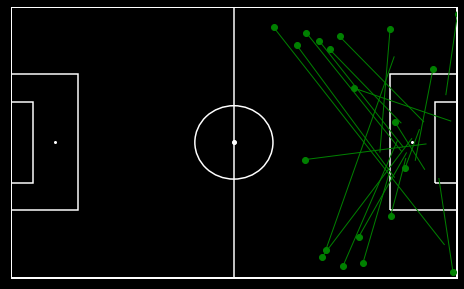

In [33]:
#Create an instance of the pitches class
pitch_drawer = pitches()

# Drawing a black pitch
fig, ax = pitch_drawer.black_pitch()

#Plotting lines to unite pass coordinates
plt.plot([cross_successfull['x_location_start_mirrored'], cross_successfull['x_location_end_mirrored']], 
         [cross_successfull['y_location_start_mirrored'], cross_successfull['y_location_end_mirrored']], 
         color='green', linestyle='-', linewidth=1)
plt.scatter(cross_successfull['x_location_start_mirrored'], cross_successfull['y_location_start_mirrored'], color = 'green')

plt.show()

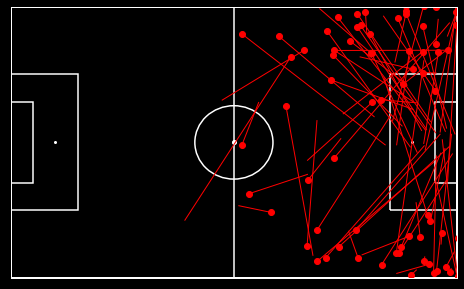

In [34]:
#Drawing a black pitch
fig, ax = pitch_drawer.black_pitch()
#Plotting lines to unite pass coordinates
plt.plot([cross_unsuccessfull['x_location_start_mirrored'], cross_unsuccessfull['x_location_end_mirrored']], 
         [cross_unsuccessfull['y_location_start_mirrored'], cross_unsuccessfull['y_location_end_mirrored']], 
         color='red', linestyle='-', linewidth=1)
plt.scatter(cross_unsuccessfull['x_location_start_mirrored'], cross_unsuccessfull['y_location_start_mirrored'], color = 'red')
plt.show()

In [35]:
arg_merged.head(20)

,match_id,match_run_time_in_ms,match_run_time,match_time_in_ms,event_id,team_id,from_player_id,player_seq_id,event_order,half_time,category,event_type,event,side,x,x_mirrored,y,y_mirrored,action_type,to_player_id,sequence_type,outcome,outcome_additional,opposition_touch,body_type,direction,pressure,style,style_additional,frame_location,game_state,game_period,game_period_additional,game_involvement,origin,origin_additional,save_type,save_detail,stance,x_frame,y_frame,movement,offering_to_receive_total_units,line_break_direction,line_break_outcome,team_shape,team_unit,team_units_broken,total_team_units,event_end_time_in_ms,x_location_start,x_location_start_mirrored,x_location_end,x_location_end_mirrored,y_location_start,y_location_start_mirrored,y_location_end,y_location_end_mirrored,version,team_name,from_player_shirt_number,to_player_name,to_player_shirt_number,from_player_name,from_overall_position,from_specific_position
0,140980,983,00:00:00,983,5,1884881,420326,3,1,1,out_of_possession,defensive_pressure,pressing,r,0.483714,0.516286,0.598676,0.401324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shown_outside,indirect_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,10.0,NaN,NaN,DALILA IPPOLITO,MF,ST
1,140980,2302,00:00:02,2302,8,1884881,420326,3,2,1,out_of_possession,possession_outcome,possession_outcome,r,0.448476,0.551524,0.513824,0.486176,NaN,NaN,possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,10.0,NaN,NaN,DALILA IPPOLITO,MF,ST
2,140980,2727,00:00:02,2727,10,1884881,420334,5,1,1,out_of_possession,defensive_pressure,pushing_on,r,0.643143,0.356857,0.169412,0.830588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,3.0,NaN,NaN,ELIANA STABILE,DF,LB
3,140980,4448,00:00:04,4448,14,1884881,461589,7,1,1,out_of_possession,defensive_pressure,pressing,r,0.508952,0.491048,0.145294,0.854706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shown_outside,indirect_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,18.0,NaN,NaN,CELESTE DOS SANTOS,FW,LM
4,140980,4893,00:00:04,4893,15,1884881,420334,5,2,1,out_of_possession,possession_outcome,possession_outcome,r,0.646667,0.353333,0.113088,0.886912,NaN,NaN,possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,3.0,NaN,NaN,ELIANA STABILE,DF,LB
5,140980,6462,00:00:06,6462,18,1884881,420328,9,1,1,out_of_possession,defensive_pressure,pushing_on,r,0.710000,0.290000,0.384118,0.615882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,14.0,NaN,NaN,MIRIAM MAYORGA,DF,CB
6,140980,6907,00:00:06,6907,20,1884881,461589,7,2,1,out_of_possession,possession_outcome,possession_outcome,r,0.504952,0.495048,0.156471,0.843529,NaN,NaN,possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,18.0,NaN,NaN,CELESTE DOS SANTOS,FW,LM
7,140980,7802,00:00:07,7802,23,1884881,420328,9,2,1,out_of_possession,possession_outcome,possession_outcome,r,0.660190,0.339810,0.319559,0.680441,NaN,NaN,possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,14.0,NaN,NaN,MIRIAM MAYORGA,DF,CB
8,140980,8452,00:00:08,8452,27,1884881,461594,12,1,1,out_of_possession,defensive_pressure,pushing_on,r,0.682000,0.318000,0.503676,0.496324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [36]:
arg_merged['body_type'].unique()

array([nan, 'right_foot', 'head', 'left_foot', 'feet', 'upper_body',
       'hands', 'body', 'lower_body'], dtype=object)

In [37]:
arg_merged.head()

,match_id,match_run_time_in_ms,match_run_time,match_time_in_ms,event_id,team_id,from_player_id,player_seq_id,event_order,half_time,category,event_type,event,side,x,x_mirrored,y,y_mirrored,action_type,to_player_id,sequence_type,outcome,outcome_additional,opposition_touch,body_type,direction,pressure,style,style_additional,frame_location,game_state,game_period,game_period_additional,game_involvement,origin,origin_additional,save_type,save_detail,stance,x_frame,y_frame,movement,offering_to_receive_total_units,line_break_direction,line_break_outcome,team_shape,team_unit,team_units_broken,total_team_units,event_end_time_in_ms,x_location_start,x_location_start_mirrored,x_location_end,x_location_end_mirrored,y_location_start,y_location_start_mirrored,y_location_end,y_location_end_mirrored,version,team_name,from_player_shirt_number,to_player_name,to_player_shirt_number,from_player_name,from_overall_position,from_specific_position
0,140980,983,00:00:00,983,5,1884881,420326,3,1,1,out_of_possession,defensive_pressure,pressing,r,0.483714,0.516286,0.598676,0.401324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shown_outside,indirect_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,10.0,NaN,NaN,DALILA IPPOLITO,MF,ST
1,140980,2302,00:00:02,2302,8,1884881,420326,3,2,1,out_of_possession,possession_outcome,possession_outcome,r,0.448476,0.551524,0.513824,0.486176,NaN,NaN,possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,10.0,NaN,NaN,DALILA IPPOLITO,MF,ST
2,140980,2727,00:00:02,2727,10,1884881,420334,5,1,1,out_of_possession,defensive_pressure,pushing_on,r,0.643143,0.356857,0.169412,0.830588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,3.0,NaN,NaN,ELIANA STABILE,DF,LB
3,140980,4448,00:00:04,4448,14,1884881,461589,7,1,1,out_of_possession,defensive_pressure,pressing,r,0.508952,0.491048,0.145294,0.854706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,shown_outside,indirect_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,18.0,NaN,NaN,CELESTE DOS SANTOS,FW,LM
4,140980,4893,00:00:04,4893,15,1884881,420334,5,2,1,out_of_possession,possession_outcome,possession_outcome,r,0.646667,0.353333,0.113088,0.886912,NaN,NaN,possession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,v1.1,ARGENTINA,3.0,NaN,NaN,ELIANA STABILE,DF,LB


In [38]:
#Calculating footness score
foot = arg_merged[(arg_merged['body_type'] == 'right_foot') 
            | (arg_merged['body_type'] == 'left_foot')
]
foot.value_counts('body_type')

body_type
right_foot    1938
left_foot      745
dtype: int64

In [39]:
relevant_feet = ['right_foot','left_foot']

foot = foot[foot['body_type'].isin(relevant_feet)]

foot_final = foot.pivot_table(index=['from_player_id','from_player_name','team_name'], 
                             columns='body_type', 
                             aggfunc='size', 
                             fill_value=0).reset_index()
foot_final.columns.name = None

In [40]:
foot_final['footness_score'] = (foot_final['left_foot'] / (foot_final['left_foot'] + foot_final['right_foot'])).round(2)

foot_final['pref_foot'] = 'both'  # Start by assigning 'right' to all rows
foot_final.loc[foot_final['footness_score'] > 0.60, 'pref_foot'] = 'left'
foot_final.loc[foot_final['footness_score'] < 0.40, 'pref_foot'] = 'right'

In [41]:
foot_final[(foot_final['team_name'] == 'ARGENTINA')].sort_values('pref_foot')

,from_player_id,from_player_name,team_name,left_foot,right_foot,footness_score,pref_foot
9,417317,YAMILA RODRIGUEZ,ARGENTINA,51,58,0.47,both
22,461595,ESTEFANIA PALOMAR,ARGENTINA,15,1,0.94,left
17,461589,CELESTE DOS SANTOS,ARGENTINA,70,24,0.74,left
14,420334,ELIANA STABILE,ARGENTINA,281,10,0.97,left
24,461597,CHIARA SINGARELLA,ARGENTINA,11,3,0.79,left
0,199325,CORREA VANINA,ARGENTINA,3,50,0.06,right
23,461596,CATALINA ROGGERONE,ARGENTINA,1,2,0.33,right
21,461594,ROMINA NUNEZ,ARGENTINA,17,138,0.11,right
20,461593,LONIGRO ERICA,ARGENTINA,3,6,0.33,right
19,461591,JULIETA CRUZ,ARGENTINA,8,126,0.06,right


In [27]:
#Finding out strong pass links
line_break = arg_merged[(arg_merged['event'] == 'pass') 
            & (arg_merged['outcome'] == 'possession_complete') & (arg_merged['line_break_outcome'] == 'line_break_complete')
]
line_break

,match_id,match_run_time_in_ms,match_run_time,match_time_in_ms,event_id,team_id,from_player_id,player_seq_id,event_order,half_time,category,event_type,event,side,x,x_mirrored,y,y_mirrored,action_type,to_player_id,sequence_type,outcome,outcome_additional,opposition_touch,body_type,direction,pressure,style,style_additional,frame_location,game_state,game_period,game_period_additional,game_involvement,origin,origin_additional,save_type,save_detail,stance,x_frame,y_frame,movement,offering_to_receive_total_units,line_break_direction,line_break_outcome,team_shape,team_unit,team_units_broken,total_team_units,event_end_time_in_ms,x_location_start,x_location_start_mirrored,x_location_end,x_location_end_mirrored,y_location_start,y_location_start_mirrored,y_location_end,y_location_end_mirrored,version,team_name,from_player_shirt_number,to_player_shirt_number,from_player_name,from_overall_position,from_specific_position,to_player_name
109,140980,123138,00:02:03,123138,207,1884881,461591,76,3,1,in_possession,distribution,pass,r,0.350286,0.649714,0.876176,0.123824,NaN,277429.0,NaN,possession_complete,NaN,NaN,right_foot,NaN,no_pressure,lofted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,over,line_break_complete,inside,NaN,2,3.0,NaN,0.350286,0.649714,0.211333,0.788667,0.876176,0.123824,0.654412,0.345588,v1.1,ARGENTINA,4.0,19.0,JULIETA CRUZ,DF,RB,MARIANA LARROQUETTE
131,140980,205497,00:03:25,205497,274,1884881,330068,99,2,1,in_possession,distribution,pass,r,0.961810,0.038190,0.395882,0.604118,onto,461590.0,NaN,possession_complete,NaN,NaN,right_foot,NaN,no_pressure,lofted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,over,line_break_complete,inside,NaN,1,3.0,NaN,0.961810,0.038190,0.580000,0.420000,0.395882,0.604118,0.225000,0.775000,v1.1,ARGENTINA,12.0,13.0,LAURINA OLIVEROS,GK,GK,SOPHIA BRAUN
291,140980,485062,00:08:05,485062,634,1884881,357688,224,3,1,in_possession,distribution,pass,r,0.611619,0.388381,0.592647,0.407353,NaN,461589.0,NaN,possession_complete,NaN,NaN,right_foot,NaN,no_pressure,push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,through,line_break_complete,outside,NaN,1,3.0,NaN,0.611619,0.388381,0.491238,0.508762,0.592647,0.407353,0.415882,0.584118,v1.1,ARGENTINA,6.0,18.0,ALDANA COMETTI,DF,CB,CELESTE DOS SANTOS
420,140980,742907,00:12:22,742907,967,1884881,330068,336,2,1,in_possession,distribution,pass,r,0.955905,0.044095,0.391618,0.608382,onto,461590.0,NaN,possession_complete,NaN,NaN,right_foot,NaN,no_pressure,lofted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,over,line_break_complete,inside,NaN,1-2,3.0,NaN,0.955905,0.044095,0.558952,0.441048,0.391618,0.608382,0.263088,0.736912,v1.1,ARGENTINA,12.0,13.0,LAURINA OLIVEROS,GK,GK,SOPHIA BRAUN
440,140980,804763,00:13:24,804763,996,1884881,330068,345,2,1,in_possession,distribution,pass,r,0.948381,0.051619,0.583971,0.416029,onto,461590.0,NaN,possession_complete,NaN,NaN,right_foot,NaN,no_pressure,lofted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,over,line_break_complete,inside,NaN,1,2.0,NaN,0.948381,0.051619,0.534381,0.465619,0.583971,0.416029,0.675588,0.324412,v1.1,ARGENTINA,12.0,13.0,LAURINA OLIVEROS,GK,GK,SOPHIA BRAUN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21541,140964,5095110,01:24:55,3819385,4485,1884881,330068,1472,3,2,in_possession,distribution,pass,r,0.952991,0.047009,0.464638,0.535362,around,357688.0,NaN,possession_complete,NaN,NaN,right_foot,NaN,no_pressure,push,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,around,line_break_complete,outside,NaN,1,3.0,NaN,0.952991,0.047009,0.665888,0.334112,0.464638,0.535362,0.015797,0.984203,v1.1,ARGENTINA,12.0,6.0,LAURINA OLIVEROS,GK,GK,ALDANA COMETTI
21673,140964,5380367,01:29:40,4104642,4771,1884881,357688,1569,3,2,in_possession,

In [28]:
event = ['pass']
line_break = line_break[line_break['event'].isin(event)]
line_break = line_break.pivot_table(index=['from_player_shirt_number','from_player_name','to_player_shirt_number','to_player_name'], 
                             columns='event', 
                             aggfunc='size', 
                             fill_value=0).reset_index()
line_break.columns.name = None
line_break

,from_player_shirt_number,from_player_name,to_player_shirt_number,to_player_name,pass
0,1.0,CORREA VANINA,7.0,ROMINA NUNEZ,1
1,1.0,CORREA VANINA,13.0,SOPHIA BRAUN,2
2,1.0,CORREA VANINA,14.0,MIRIAM MAYORGA,1
3,1.0,CORREA VANINA,15.0,BONSEGUNDO FLORENCIA,1
4,1.0,CORREA VANINA,16.0,BENITEZ LORENA,2
...,...,...,...,...,...
162,22.0,BANINI ESTEFANIA,13.0,SOPHIA BRAUN,2
163,22.0,BANINI ESTEFANIA,15.0,BONSEGUNDO FLORENCIA,5
164,22.0,BANINI ESTEFANIA,16.0,BENITEZ LORENA,1
165,22.0,BANINI ESTEFANIA,19.0,MARIANA LARROQUETTE,5


In [29]:
line_break.sort_values('pass', ascending = False)

,from_player_shirt_number,from_player_name,to_player_shirt_number,to_player_name,pass
43,6.0,ALDANA COMETTI,3.0,ELIANA STABILE,18
23,3.0,ELIANA STABILE,22.0,BANINI ESTEFANIA,12
138,16.0,BENITEZ LORENA,22.0,BANINI ESTEFANIA,10
113,14.0,MIRIAM MAYORGA,7.0,ROMINA NUNEZ,10
56,6.0,ALDANA COMETTI,22.0,BANINI ESTEFANIA,9
...,...,...,...,...,...
64,7.0,ROMINA NUNEZ,17.0,CAMILA GOMEZ ARES,1
63,7.0,ROMINA NUNEZ,15.0,BONSEGUNDO FLORENCIA,1
60,7.0,ROMINA NUNEZ,5.0,VANINA PREININGER,1
59,7.0,ROMINA NUNEZ,4.0,JULIETA CRUZ,1


In [30]:
confusion_matrix = pd.crosstab(line_break['from_player_shirt_number'],
                               line_break['to_player_shirt_number'],
                               values = line_break['pass'],
                               aggfunc = 'sum')
confusion_matrix = confusion_matrix.fillna(0)
confusion_matrix

to_player_shirt_number,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0
from_player_shirt_number,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,5.0
2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3.0,0.0,0.0,0.0,2.0,3.0,0.0,2.0,0.0,1.0,2.0,0.0,1.0,0.0,5.0,2.0,0.0,5.0,8.0,1.0,1.0,12.0
4.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0
5.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,4.0,2.0,3.0,0.0,0.0,0.0
6.0,0.0,18.0,2.0,0.0,0.0,4.0,3.0,1.0,0.0,3.0,0.0,8.0,1.0,2.0,1.0,1.0,7.0,2.0,0.0,0.0,9.0
7.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
8.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0
9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

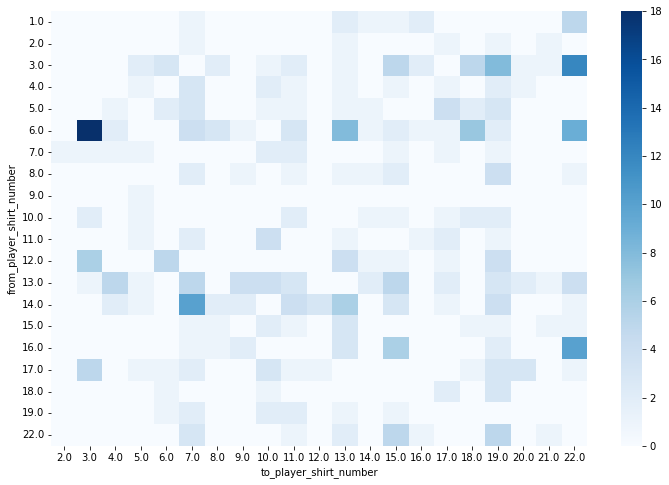

In [33]:
plt.figure(figsize = (12,8),facecolor='white')
sns.heatmap(confusion_matrix, cmap = 'Blues')
#plt.title('Player Passing Confusion Matrix')
#plt.xlabel('To Player Shirt Number')
#plt.ylabel('From Player Shirt Number')
plt.show